In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('C:/Users/Administrator/Downloads/iris.csv')

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.isnull().values.any()

False

In [8]:
df.drop_duplicates()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: >

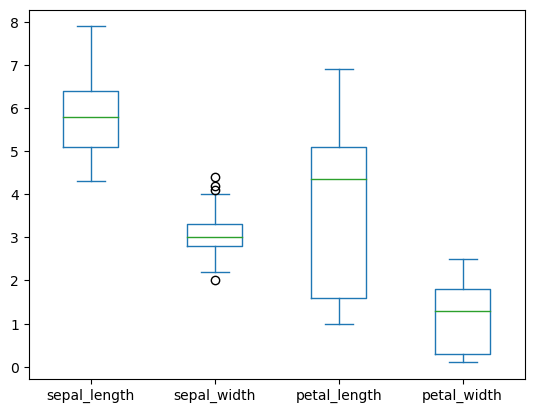

In [12]:
df[['sepal_length','sepal_width','petal_length','petal_width']].plot(kind='box')

In [15]:
q1,q3=df['sepal_width'].quantile([0.25,0.75])

In [22]:
iqr=q3-q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

In [25]:
condition = (df['sepal_width'] > upper_bound) | (df['sepal_width'] < lower_bound)

# Get the indices that satisfy the condition
indices = df.index[condition]

In [27]:
df=df.drop(indices,axis=0)

<Axes: >

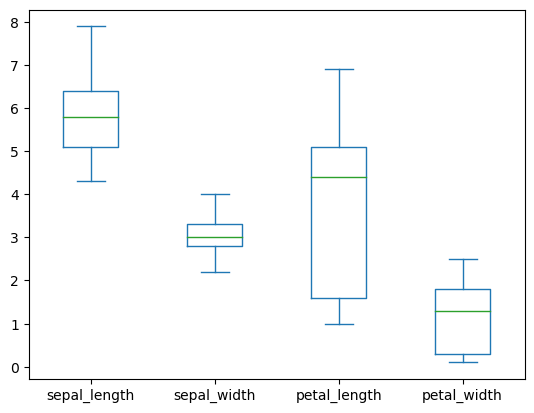

In [28]:
df[['sepal_length','sepal_width','petal_length','petal_width']].plot(kind='box')

In [31]:
pd.get_dummies(df['species'],drop_first=True)

,Iris-versicolor,Iris-virginica
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
145,False,True
146,False,True
147,False,True
148,False,True


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [34]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [36]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [37]:
svc=SVC(kernel='rbf')

In [38]:
svc.fit(x_train,y_train)

SVC()

In [39]:
y_pred=svc.predict(x_test)

In [41]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.9545454545454546

In [46]:
from sklearn.metrics import confusion_matrix

# Assuming you have y_test and y_pred already defined
conf_matrix = confusion_matrix(y_test, y_pred)


In [47]:
conf_matrix

array([[17,  0,  0],
       [ 0, 10,  1],
       [ 0,  1, 15]], dtype=int64)

In [48]:
report=classification_report(y_test,y_pred)
report

'                 precision    recall  f1-score   support\n\n    Iris-setosa       1.00      1.00      1.00        17\nIris-versicolor       0.91      0.91      0.91        11\n Iris-virginica       0.94      0.94      0.94        16\n\n       accuracy                           0.95        44\n      macro avg       0.95      0.95      0.95        44\n   weighted avg       0.95      0.95      0.95        44\n'

In [49]:
support_vectors=svc.support_vectors_

In [51]:
print(len(support_vectors))

42
